#Manipulação de Dados sobre Exportações 🛬

###Etapa 01: Importação do Conjunto de Dados

Nesse primeiro momento, é necessário realizar a importação do conjunto de dados.

In [179]:
# Importação de bibliotecas
import pandas as pd

In [180]:
# Lendo o conjunto de dados em formato .csv
url = '/content/data_fao.csv'
dados = pd.read_csv(url, encoding='ISO-8859-1')

In [181]:
# Verificando a leitura
dados.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


###Etapa 02: Exploração do Conjunto de Dados

Nesse primeiro momento, é importante realizar a exploração do conjunto de dados. Principalmente, antes de iniciar a manipulação do conjunto de dados.

In [182]:
# Obtendo as informações principais do dataframe
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64
 16  Y1967              179

In [183]:
# Identificando colunas com valores nulos (NaN)
colunas = dados.isnull().sum()
filtro = colunas > 0
colunas_com_vazio = colunas[filtro]
colunas_com_vazio

,0
Y1961,3539
Y1962,3539
Y1963,3539
Y1964,3539
Y1965,3539
Y1966,3539
Y1967,3539
Y1968,3539
Y1969,3539
Y1970,3539


Conclusão: Apenas as colunas que armazenam os valores das exportações possuem valores nulos (NaN). Salvo exceção, das duas últimas colunas (2012 e 2013).

In [184]:
# Transformando os nomes das colunas em uma lista
lista_colunas = colunas_com_vazio.index.to_list()
lista_colunas

['Y1961',
 'Y1962',
 'Y1963',
 'Y1964',
 'Y1965',
 'Y1966',
 'Y1967',
 'Y1968',
 'Y1969',
 'Y1970',
 'Y1971',
 'Y1972',
 'Y1973',
 'Y1974',
 'Y1975',
 'Y1976',
 'Y1977',
 'Y1978',
 'Y1979',
 'Y1980',
 'Y1981',
 'Y1982',
 'Y1983',
 'Y1984',
 'Y1985',
 'Y1986',
 'Y1987',
 'Y1988',
 'Y1989',
 'Y1990',
 'Y1991',
 'Y1992',
 'Y1993',
 'Y1994',
 'Y1995',
 'Y1996',
 'Y1997',
 'Y1998',
 'Y1999',
 'Y2000',
 'Y2001',
 'Y2002',
 'Y2003',
 'Y2004',
 'Y2005',
 'Y2006',
 'Y2007',
 'Y2008',
 'Y2009',
 'Y2010',
 'Y2011']

In [185]:
# Descobrindo se o valor vazio é de fato nulo (NaN)
valores_vazios = []
for coluna_vazia in lista_colunas:
  valores_vazios.append(dados[coluna_vazia].min())
valores_vazios

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

Conclusão: Os valores supostamente inconsistentes são valores zero (0.0). Sendo assim, representam que um país não realizou a exportação de um determinado produto.

In [186]:
# Obtendo os valores únicos da coluna de código de elemento
dados['Element Code'].unique()

array([5142, 5521])

Conclusão: Existem apenas dois valores únicos da coluna de código dos elementos. Portanto, a coluna será excluída.

###Etapa 03: Manipulação do Conjunto de Dados

Agora, será iniciada a transformação do conjunto de dados. De tal forma, a facilitar futuras análises.

In [187]:
# Transformando as duas últimas colunas em valores flutuantes
colunas = ['Y2012', 'Y2013']
dados[colunas] = dados[colunas].astype(float)
dados[colunas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y2012   21477 non-null  float64
 1   Y2013   21477 non-null  float64
dtypes: float64(2)
memory usage: 335.7 KB


In [188]:
# Deletando a coluna de código dos elementos
dados.drop(columns=['Element Code'], inplace=True)
dados.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element,Unit,latitude,longitude,Y1961,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,Food,1000 tonnes,33.94,67.71,1928.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810.0,4895.0
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,183.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425.0,422.0
2,AFG,2,Afghanistan,2513,Barley and products,Feed,1000 tonnes,33.94,67.71,76.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367.0,360.0
3,AFG,2,Afghanistan,2513,Barley and products,Food,1000 tonnes,33.94,67.71,237.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78.0,89.0
4,AFG,2,Afghanistan,2514,Maize and products,Feed,1000 tonnes,33.94,67.71,210.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200.0,200.0


In [189]:
# Obtendo todos os nomes das colunas dos valores de exportações
colunas_exportacoes = dados.loc[:, 'Y1961':'Y2013'].columns.to_list()

In [190]:
# Obtendo todos os nomes das colunas que serão mantidas
colunas_mantidas = dados.loc[:, 'Area Abbreviation':'longitude']

In [191]:
# Transformando o formato do dataframe
dados = dados.melt(colunas_mantidas, colunas_exportacoes, 'Year', 'Tonnes')
dados.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element,Unit,latitude,longitude,Year,Tonnes
0,AFG,2,Afghanistan,2511,Wheat and products,Food,1000 tonnes,33.94,67.71,Y1961,1928.0
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,Y1961,183.0
2,AFG,2,Afghanistan,2513,Barley and products,Feed,1000 tonnes,33.94,67.71,Y1961,76.0
3,AFG,2,Afghanistan,2513,Barley and products,Food,1000 tonnes,33.94,67.71,Y1961,237.0
4,AFG,2,Afghanistan,2514,Maize and products,Feed,1000 tonnes,33.94,67.71,Y1961,210.0


In [192]:
# Multiplicando a colunas de toneladas por mil
dados['Tonnes'] = dados['Tonnes'] * 1000.0
dados.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element,Unit,latitude,longitude,Year,Tonnes
0,AFG,2,Afghanistan,2511,Wheat and products,Food,1000 tonnes,33.94,67.71,Y1961,1928000.0
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,Y1961,183000.0
2,AFG,2,Afghanistan,2513,Barley and products,Feed,1000 tonnes,33.94,67.71,Y1961,76000.0
3,AFG,2,Afghanistan,2513,Barley and products,Food,1000 tonnes,33.94,67.71,Y1961,237000.0
4,AFG,2,Afghanistan,2514,Maize and products,Feed,1000 tonnes,33.94,67.71,Y1961,210000.0


In [193]:
# Excluindo a coluna de unidade
dados.drop(columns='Unit', inplace=True)
dados.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element,latitude,longitude,Year,Tonnes
0,AFG,2,Afghanistan,2511,Wheat and products,Food,33.94,67.71,Y1961,1928000.0
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),Food,33.94,67.71,Y1961,183000.0
2,AFG,2,Afghanistan,2513,Barley and products,Feed,33.94,67.71,Y1961,76000.0
3,AFG,2,Afghanistan,2513,Barley and products,Food,33.94,67.71,Y1961,237000.0
4,AFG,2,Afghanistan,2514,Maize and products,Feed,33.94,67.71,Y1961,210000.0


In [194]:
# Deletando a letra 'Y' da coluna de ano
dados['Year'] = dados['Year'].str.replace('Y', '')
dados['Year']

,Year
0,1961
1,1961
2,1961
3,1961
4,1961
...,...
1138276,2013
1138277,2013
1138278,2013
1138279,2013


In [195]:
# Alterando o tipo da coluna de ano para inteiro
dados['Year'] = dados['Year'].astype(int)
dados['Year']

,Year
0,1961
1,1961
2,1961
3,1961
4,1961
...,...
1138276,2013
1138277,2013
1138278,2013
1138279,2013


###Etapa 04: Criação de Conjunto de Dados

Nesse instante, será feita a criação de um conjunto de dados possuindo unicamente informações relevantes dos produtos. Portanto, não levará em considerações os dados dos países e algumas informações dos produtos (código, elemento etc).

In [196]:
# Criando uma cópia do dataframe
produtos = dados.copy()
produtos.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element,latitude,longitude,Year,Tonnes
0,AFG,2,Afghanistan,2511,Wheat and products,Food,33.94,67.71,1961,1928000.0
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),Food,33.94,67.71,1961,183000.0
2,AFG,2,Afghanistan,2513,Barley and products,Feed,33.94,67.71,1961,76000.0
3,AFG,2,Afghanistan,2513,Barley and products,Food,33.94,67.71,1961,237000.0
4,AFG,2,Afghanistan,2514,Maize and products,Feed,33.94,67.71,1961,210000.0


In [197]:
# Especificando as colunas para remoção
colunas_remocao = ['Area Abbreviation', 'Area Code', 'Area',
                  'latitude', 'longitude', 'Item Code', 'Element']

In [198]:
# Excluindo as colunas dos países desse dataframe
produtos.drop(columns=colunas_remocao, inplace=True)
produtos.head()

,Item,Year,Tonnes
0,Wheat and products,1961,1928000.0
1,Rice (Milled Equivalent),1961,183000.0
2,Barley and products,1961,76000.0
3,Barley and products,1961,237000.0
4,Maize and products,1961,210000.0


In [199]:
# Agrupando o dataframe antes de realização a transposição
produtos = produtos.groupby(['Year', 'Item'])[['Tonnes']].mean().round(2)
produtos.head()

Tonnes
Year Item                              
1961 Alcoholic Beverages      482234.48
     Animal fats               42983.40
     Apples and products       71741.72
     Aquatic Animals, Others     348.21
     Aquatic Plants             3637.68

In [200]:
# Transpondo o dataframe para o formato wide
produtos = produtos.pivot_table(index='Year', columns='Item', values='Tonnes')

In [201]:
# Visualizando o dataframe
produtos.head()

Item,Alcoholic Beverages,Animal fats,Apples and products,"Aquatic Animals, Others",Aquatic Plants,"Aquatic Products, Other",Bananas,Barley and products,Beans,Beer,...,"Sweeteners, Other",Tea (including mate),Tomatoes and products,Treenuts,Vegetable Oils,Vegetables,"Vegetables, Other",Wheat and products,Wine,Yams
Year,,,,,,,,,,,,,,,,,,,,,
1961,482234.48,42983.40,71741.72,348.21,3637.68,3802.82,103893.75,207085.20,56906.25,259234.48,...,13979.73,7910.96,140571.43,17324.14,84000.00,872126.21,714048.54,636830.28,135258.74,61250.00
1962,499634.48,45348.55,86821.19,348.21,4210.14,4373.24,107700.00,219349.78,59368.75,266889.66,...,14750.00,7931.51,150210.88,17124.14,89843.14,868631.07,701917.48,663500.00,139223.78,60809.52
1963,517965.52,46124.48,92940.40,366.07,4181.16,4352.11,111900.00,231578.48,60418.75,277751.72,...,16020.27,7945.21,142816.33,17696.55,94078.43,872412.62,710606.80,675802.75,143972.03,67654.76
1964,537765.52,47141.08,96086.09,401.79,4485.51,4683.10,117093.75,242977.58,62950.00,298234.48,...,17087.84,8328.77,149965.99,18075.86,98307.19,860951.46,693893.20,716848.62,142601.40,72392.86
1965,552600.00,47589.21,90675.50,437.50,5065.22,5267.61,128906.25,246390.13,61293.75,308200.00,...,18932.43,8445.21,155027.21,17875.86,103732.03,885024.27,713247.57,774412.84,146923.08,78571.43


array([<Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Y

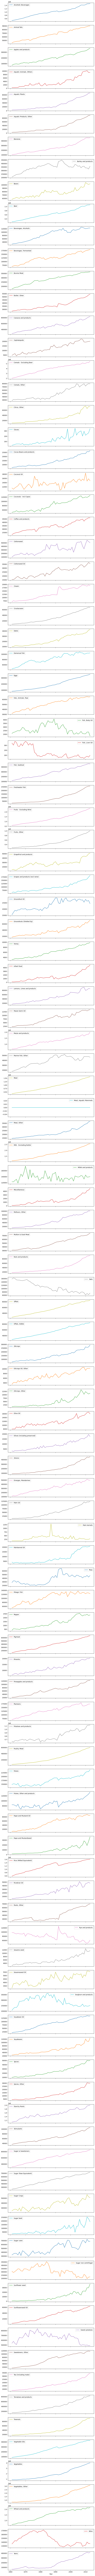

In [202]:
# Construindo um gráfico para cada produto
# Isso mostra a relevância desse formato de dataframe
produtos.plot(subplots=True, figsize=(10, 300))

###Etapa 05: Exportação dos Conjuntos de Dados

Por fim, será efetuada a exportação dos conjuntos de dados. É válido ressaltar que, ambos serão para arquivo .csv (formato).

In [203]:
# Exportando o conjunto de dados original
dados.to_csv('exportacoes.csv', index=False)

In [204]:
# Verificando se o arquivo foi gerado corretamente
url_teste = '/content/exportacoes.csv'
pd.read_csv(url_teste, encoding='ISO-8859-1')

,Area Abbreviation,Area Code,Area,Item Code,Item,Element,latitude,longitude,Year,Tonnes
0,AFG,2,Afghanistan,2511,Wheat and products,Food,33.94,67.71,1961,1928000.0
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),Food,33.94,67.71,1961,183000.0
2,AFG,2,Afghanistan,2513,Barley and products,Feed,33.94,67.71,1961,76000.0
3,AFG,2,Afghanistan,2513,Barley and products,Food,33.94,67.71,1961,237000.0
4,AFG,2,Afghanistan,2514,Maize and products,Feed,33.94,67.71,1961,210000.0
...,...,...,...,...,...,...,...,...,...,...
1138276,ZWE,181,Zimbabwe,2948,Milk - Excluding Butter,Food,-19.02,29.15,2013,451000.0
1138277,ZWE,181,Zimbabwe,2960,"Fish, Seafood",Feed,-19.02,29.15,2013,15000.0
1138278,ZWE,181,Zimbabwe,2960,"Fish, Seafood",Food,-19.02,29.15,2013,40000.0
1138279,ZWE,181,Zimbabwe,2961,"Aquatic Products, Other",Food,-19.02,29.15,2013,0.0


In [205]:
# Exportando o conjunto de dados dos produtos
produtos.to_csv('produtos.csv', index=False)

In [206]:
# Verificando se o arquivo foi gerado com sucesso
url_teste = '/content/produtos.csv'
pd.read_csv(url_teste, encoding='ISO-8859-1')

,Alcoholic Beverages,Animal fats,Apples and products,"Aquatic Animals, Others",Aquatic Plants,"Aquatic Products, Other",Bananas,Barley and products,Beans,Beer,...,"Sweeteners, Other",Tea (including mate),Tomatoes and products,Treenuts,Vegetable Oils,Vegetables,"Vegetables, Other",Wheat and products,Wine,Yams
0,482234.48,42983.40,71741.72,348.21,3637.68,3802.82,103893.75,207085.20,56906.25,259234.48,...,13979.73,7910.96,140571.43,17324.14,84000.00,872126.21,714048.54,636830.28,135258.74,61250.00
1,499634.48,45348.55,86821.19,348.21,4210.14,4373.24,107700.00,219349.78,59368.75,266889.66,...,14750.00,7931.51,150210.88,17124.14,89843.14,868631.07,701917.48,663500.00,139223.78,60809.52
2,517965.52,46124.48,92940.40,366.07,4181.16,4352.11,111900.00,231578.48,60418.75,277751.72,...,16020.27,7945.21,142816.33,17696.55,94078.43,872412.62,710606.80,675802.75,143972.03,67654.76
3,537765.52,47141.08,96086.09,401.79,4485.51,4683.10,117093.75,242977.58,62950.00,298234.48,...,17087.84,8328.77,149965.99,18075.86,98307.19,860951.46,693893.20,716848.62,142601.40,72392.86
4,552600.00,47589.21,90675.50,437.50,5065.22,5267.61,128906.25,246390.13,61293.75,308200.00,...,18932.43,8445.21,155027.21,17875.86,103732.03,885024.27,713247.57,774412.84,146923.08,78571.43
5,576965.52,47751.04,93880.79,937.50,5702.90,6281.69,134325.00,248713.00,59850.00,321986.21,...,19459.46,8876.71,162598.64,18586.21,107954.25,914669.90,736766.99,779045.87,150174.83,82750.00
6,593758.62,49684.65,108185.43,892.86,6065.22,6598.59,139425.00,253022.42,64343.75,333896.55,...,21560.81,8630.14,166789.12,19427.59,111169.93,933213.59,748281.55,786555.05,150321.68,92511.90
7,614310.34,51141.08,109847.68,1044.64,6036.23,6690.14,142887.50,271098.65,61275.00,345751.72,...,23472.97,8958.90,181054.42,19924.14,115352.94,970616.50,774422.33,823532.11,155321.68,98178.57
8,639510.34,50883.82,118880.79,1044.64,6811.59,7443.66,149018.75,293726.46,60931.25,367372.41,...,23898.65,9027.40,179605.44,19958.62,119509.80,986951.46,789582.52,869990.83,156475.52,108583.33
9,674406.90,51087.14,113284.77,1705.36,6210.14,7366.20,157693.75,294941.70,64237.50,388468.97,...,24628.38,9417.81,184163.27,21282.76,126058.82,966451.46,768334.95,895665.14,158860.14,120166.67
